# Temporal Average Testing

Test procedure:
- XCDAT is source-installed from branch `feature/201-temporal-mean`
- PR: https://github.com/xCDAT/xcdat/pull/236

## Load test data

In [1]:
import os

In [2]:
demo_data_dir = '../tutorials/demo_data/CMIP5_demo_data'
demo_filename = 'ts_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc'
demo_file = os.path.join(demo_data_dir, demo_filename)

In [3]:
import xcdat

In [4]:
ds = xcdat.open_dataset(demo_file)

In [5]:
ts = ds.ts

In [6]:
ts

<xarray.DataArray 'ts' (time: 1872, lat: 145, lon: 192)>
[52116480 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:     surface_temperature
    long_name:         Surface Temperature
    comment:           ""skin"" temperature (i.e., SST for open ocean)
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2012-01-17T03:16:09Z altered by CMOR: replaced missing...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

## 1. Temporal Average

### 1.1 Default (`center_times=False`, `weighted=True`)

In [7]:
ds_ave_month = ds.temporal.average("ts")

In [8]:
ds_ave_month = ds.temporal.average("ts", weighted=True)

In [9]:
ds_ave_month.ts.shape

(145, 192)

In [10]:
ds_ave_month

<xarray.Dataset>
Dimensions:   (lat: 145, bnds: 2, lon: 192)
Coordinates:
  * lat       (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon       (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 ...
    lon_bnds  (lon, bnds) float64 ...
    ts        (lat, lon) float64 224.6 224.6 224.6 224.6 ... 253.8 253.8 253.8
Attributes: (12/28)
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    institute_id:           CSIRO-BOM
    experiment_id:          historical
    source:                 ACCESS1-0 2011. Atmosphere: AGCM v1.0 (N96 grid-p...
    model_id:               ACCESS1-0
    forcing:                GHG, Oz, SA, Sl, Vl, BC, OC, (GHG = CO2, N2O, CH4...
    ...                     ...
    table_id:               Table Amon (27 April 2011) 9c851218e3842df9a62ef3...
    title:                  ACCESS1-0 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.8.0

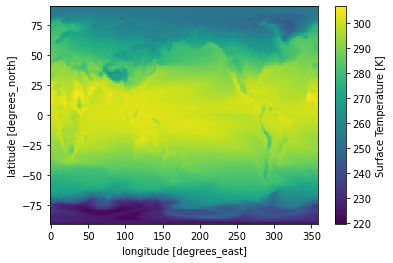

In [11]:
ds_ave_month.ts.plot()

### 1.2 `weighted=False`

In [12]:
ds_ave_month_nw = ds.temporal.average("ts", weighted=False)

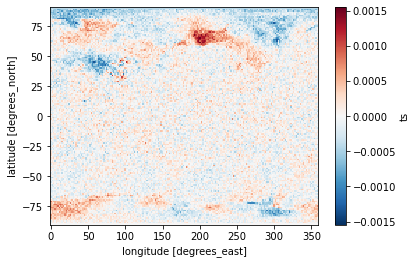

In [13]:
(ds_ave_month.ts - ds_ave_month_nw.ts).plot()

### 1.3 `center_times=True`

In [14]:
ds_ave_month_center = ds.temporal.average("ts", center_times=True)

In [15]:
ds_ave_month_center.ts.shape

(145, 192)

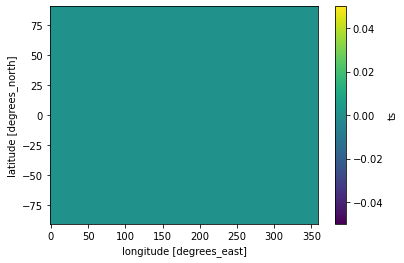

In [16]:
(ds_ave_month.ts - ds_ave_month_center.ts).plot()

## 2. Group Average

### 2.1 Month

In [17]:
ds_gra_month = ds.temporal.group_average("ts", freq="month")

In [18]:
ds_gra_month.ts.shape

(1872, 145, 192)

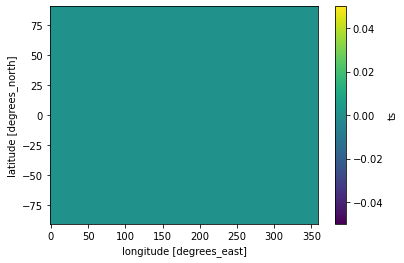

In [19]:
(ds_gra_month.ts[0]-ds.ts[0]).plot()

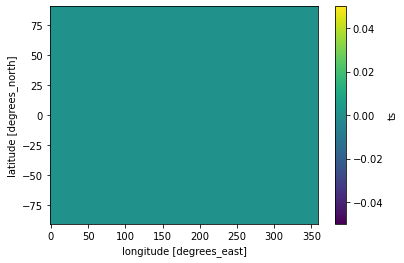

In [20]:
(ds_gra_month.ts[-1]-ds.ts[-1]).plot()

### 2.2 Year

In [21]:
ds_gra_year = ds.temporal.group_average("ts", freq="year")

In [22]:
ds_gra_year.ts.shape

(156, 145, 192)

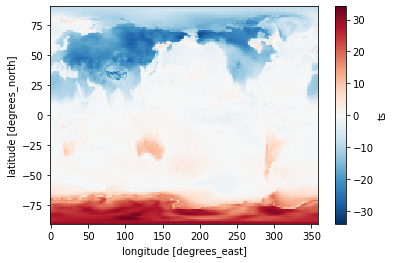

In [35]:
(ds_gra_month.ts[-1]-ds_gra_year.ts[-1]).plot()  # Just checking there are NOT same

### 2.3 Season

In [23]:
ds_gra_season = ds.temporal.group_average("ts", freq="season")

In [24]:
ds_gra_season.ts.shape

(625, 145, 192)

In [25]:
ds_gra_season

<xarray.Dataset>
Dimensions:   (lat: 145, bnds: 2, lon: 192, time: 625)
Coordinates:
  * lat       (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon       (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time      (time) datetime64[ns] 1850-01-01 1850-04-01 ... 2006-01-01
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 ...
    lon_bnds  (lon, bnds) float64 ...
    ts        (time, lat, lon) float32 245.8 245.8 245.8 ... 248.2 248.2 248.2
Attributes: (12/28)
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    institute_id:           CSIRO-BOM
    experiment_id:          historical
    source:                 ACCESS1-0 2011. Atmosphere: AGCM v1.0 (N96 grid-p...
    model_id:               ACCESS1-0
    forcing:                GHG, Oz, SA, Sl, Vl, BC, OC, (GHG = CO2, N2O, CH4...
    ...                     ...
    table_id:               Table Amon (27 April 2011) 9c851218e3842df9a62ef3...
    title:                  ACCESS1-0 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.8.0

In [26]:
season_config_dict = {"dec_mode": "DJF", "drop_incomplete_djf": True}
ds_gra_season2 = ds.temporal.group_average("ts", freq="season", season_config=season_config_dict)

In [27]:
ds_gra_season2.ts.shape

(623, 145, 192)

In [28]:
ds_gra_season2

<xarray.Dataset>
Dimensions:   (lat: 145, lon: 192, bnds: 2, time: 623)
Coordinates:
  * lat       (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon       (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time      (time) datetime64[ns] 1850-04-01 1850-07-01 ... 2005-10-01
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 ...
    lon_bnds  (lon, bnds) float64 ...
    ts        (time, lat, lon) float32 216.7 216.7 216.7 ... 260.4 260.4 260.4
Attributes: (12/28)
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    institute_id:           CSIRO-BOM
    experiment_id:          historical
    source:                 ACCESS1-0 2011. Atmosphere: AGCM v1.0 (N96 grid-p...
    model_id:               ACCESS1-0
    forcing:                GHG, Oz, SA, Sl, Vl, BC, OC, (GHG = CO2, N2O, CH4...
    ...                     ...
    table_id:               Table Amon (27 April 2011) 9c851218e3842df9a62ef3...
    title:                  ACCESS1-0 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.8.0

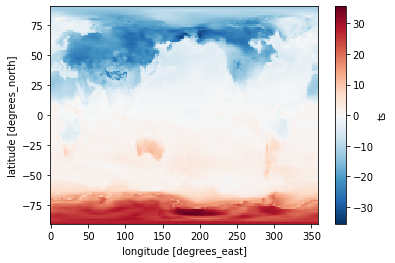

In [36]:
(ds_gra_season.ts[-1]-ds_gra_season2.ts[-1]).plot()  # Just checking there are NOT same

### 2.4 Day

In [29]:
ds_gra_day = ds.temporal.group_average("ts", freq="day")

In [30]:
ds_gra_day.ts.shape

(1872, 145, 192)

In [31]:
ds_gra_day.ts[0] - ds_gra_month.ts[0]

<xarray.DataArray 'ts' (lat: 145, lon: 192)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

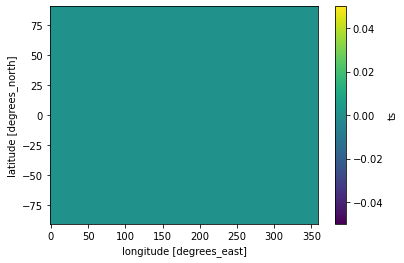

In [37]:
(ds_gra_day.ts[-1]-ds_gra_month.ts[-1]).plot()  # Just checking there ARE same

### 2.5 Hour

In [32]:
ds_gra_hour = ds.temporal.group_average("ts", freq="hour")

In [33]:
ds_gra_hour.ts.shape

(1872, 145, 192)

In [34]:
ds_gra_hour.ts[0] - ds_gra_month.ts[0]

<xarray.DataArray 'ts' (lat: 145, lon: 192)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

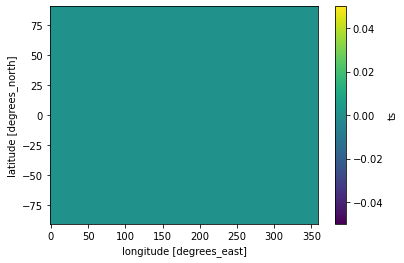

In [38]:
(ds_gra_hour.ts[-1]-ds_gra_month.ts[-1]).plot()  # Just checking there ARE same